In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
# import nbconvert
sys.path.append('D:\Academics\Thesis\Paper\Code\Validation')
from Wave_Module import *

# Set '2'

* At the end of the test-to-failure experiment, outer race failure occurred in
bearing 1

## Bearing '1'


### Healthy

Input Data from DataSet

In [30]:
Hdata = Input(r'D:\Academics\Thesis\DataBases\IMS\2nd_test\2004.02.12.10.32.39')
Hdata = Hdata['channel1'].to_numpy()  # Channel 1 is for Bearing 1

FFT Spectrum

In [31]:
# Bearing 1 vibration data is in channel 1
Hwave = wave(data=Hdata, Fs=20000)  # this variable is in wave class and can use it's functions
Hfreq, Hmag= Hwave.FFT()

Plotting

Text(0, 0.5, 'Frequency Domain (Spectrum) Magnitude')

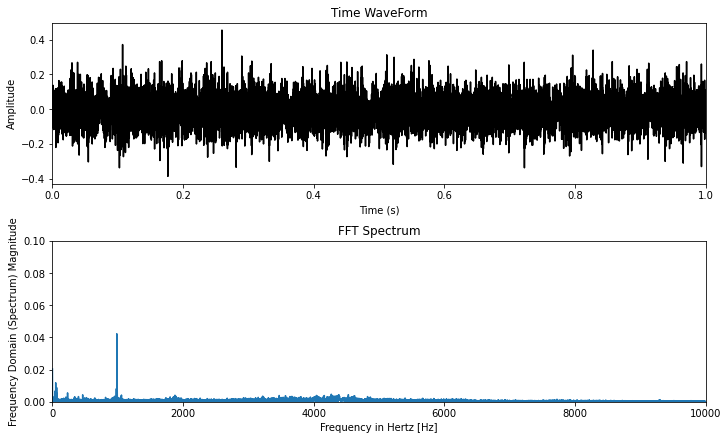

In [32]:
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, constrained_layout=True, figsize=(10, 6))

############## Time WaveForm ##################
ax1.set_title('Time WaveForm')
ax1.plot(Hwave.time(), Hdata, color='k')
ax1.set_xlim(0,1)
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Time (s)')

############# FFT Spectrum ####################
ax2.set_title('FFT Spectrum')
ax2.plot(Hfreq, Hmag)
ax2.set_ylim(0, 0.1)
ax2.set_xlim(0, 10000)
ax2.set_xlabel('Frequency in Hertz [Hz]')
ax2.set_ylabel('Frequency Domain (Spectrum) Magnitude')


### Faulty

Input Data from DataSet

In [33]:
Fdata = Input(r'D:\Academics\Thesis\DataBases\IMS\2nd_test\2004.02.19.06.02.39')
Fdata = Fdata['channel1'].to_numpy()

FFT Spectrum

In [34]:
# Bearing 1 vibration data is in channel 1
Fwave = wave(data=Fdata, Fs=20000)  # this variable is in wave class and can use it's functions
Ffreq, Fmag = Fwave.FFT()  # frequencies and their magnitude

Plotting

Text(0, 0.5, 'Frequency Domain (Spectrum) Magnitude')

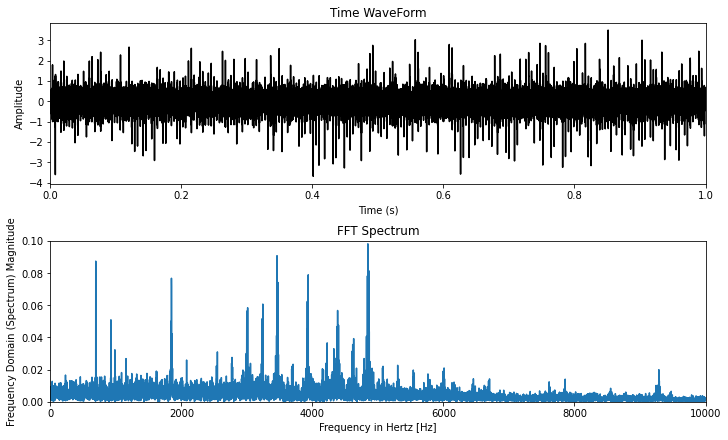

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, constrained_layout=True, figsize=(10,6))

############## Time WaveForm ##################
ax1.set_title('Time WaveForm')
ax1.plot(Fwave.time(), Fdata, color='k')
ax1.set_xlim(0,1)
ax1.set_ylabel('Amplitude')
ax1.set_xlabel('Time (s)')

############# FFT Spectrum ####################
ax2.set_title('FFT Spectrum')
ax2.plot(Ffreq, Fmag)
ax2.set_ylim(0, 0.1)
ax2.set_xlim(0, 10000)
ax2.set_xlabel('Frequency in Hertz [Hz]')
ax2.set_ylabel('Frequency Domain (Spectrum) Magnitude')

### Analyse

Bearing characteristic frequencies (Rexnord ZA-2115)

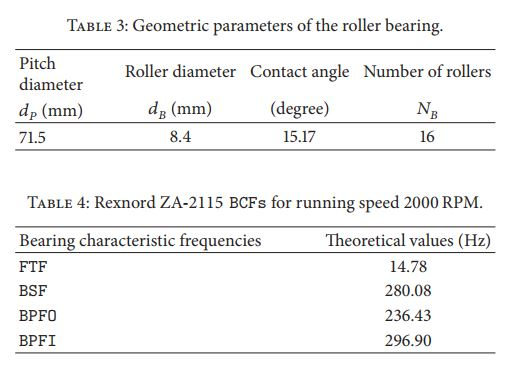

In [36]:
img = Image.open(r'D:\Academics\Thesis\DataBases\IMS\Capture1.jpg')
img

Plotting

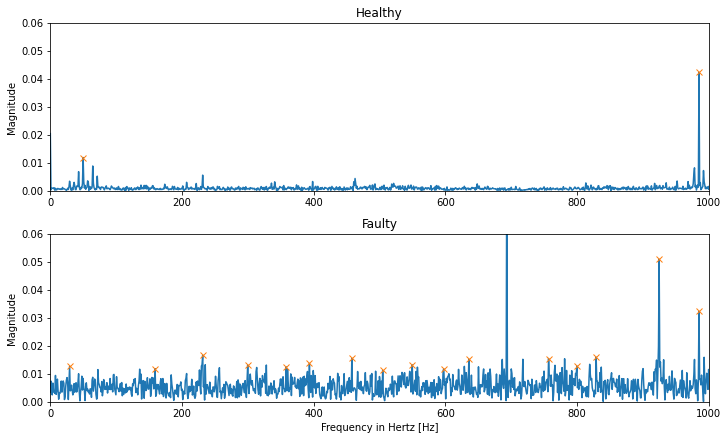

In [37]:
Hpeaks = Hwave.peaks(prominence= 100)  # Healthy peaks location 
Fpeaks = Fwave.peaks(prominence= 100, distance=30)  # Faulty peaks location

# N is equal to Fs/L where L (number of data points 20,480) and Fs (Sample Rate 20000 Hz) 
# do not change in different data
N = 20000/20480

fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, constrained_layout=True, figsize=(10, 6))

########## Health Data ############
ax1.set_title('Healthy')
ax1.plot(Hfreq, Hmag)
ax1.set_ylim(0, 0.06)
ax1.set_xlim(0, 1000)
# ax1.set_xlabel('Frequency in Hertz [Hz]')
ax1.set_ylabel('Magnitude')
ax1.plot(Hpeaks, (Hmag)[[int(i) for i in Hpeaks/N]], "x")
ax1.plot(np.zeros_like(len(Hmag)), "--", color="gray")

########## Faulty Data #############
ax2.set_title('Faulty')
ax2.plot(Ffreq, Fmag)
ax2.set_ylim(0, 0.06)
ax2.set_xlim(0, 1000)
ax2.set_xlabel('Frequency in Hertz [Hz]')
ax2.set_ylabel('Magnitude')
ax2.plot(Fpeaks, (Fmag)[[int(i) for i in Fpeaks/N]], "x")
ax2.plot(np.zeros_like(len(Fmag)), "--", color="gray")

In [38]:
Fpeaks  # Faulty Peak Value

array([  29.296875 ,  159.1796875,  231.4453125,  299.8046875,
        358.3984375,  393.5546875,  458.0078125,  504.8828125,
        549.8046875,  597.65625  ,  635.7421875,  693.359375 ,
        756.8359375,  799.8046875,  829.1015625,  924.8046875,
        985.3515625, 1021.484375 , 1051.7578125, 1086.9140625,
       1155.2734375, 1243.1640625, 1283.203125 , 1318.359375 ,
       1351.5625   , 1382.8125   , 1436.5234375, 1474.609375 ,
       1522.4609375, 1579.1015625, 1618.1640625, 1705.078125 ,
       1745.1171875, 1783.203125 , 1848.6328125, 1920.8984375,
       1976.5625   , 2011.71875  , 2080.078125 , 2141.6015625,
       2234.375    , 2304.6875   , 2341.796875 , 2391.6015625,
       2463.8671875, 2549.8046875, 2610.3515625, 2652.34375  ,
       2686.5234375, 2773.4375   , 2823.2421875, 2883.7890625,
       2939.453125 , 2976.5625   , 3011.71875  , 3054.6875   ,
       3084.9609375, 3160.15625  , 3200.1953125, 3243.1640625,
       3286.1328125, 3328.125    , 3409.1796875, 3459.9

In [39]:
Hpeaks  # Healthy Peak Value

array([ 49.8046875, 985.3515625])

Since Bearing Fault occurs in high frequencies and they also have high energies, it is necessary to use Enveloped signal for analysing.

Here we used Hilbert Function to envelope the vibration signal. 

Enveloped FFT

In [40]:
########### Healthy ############
Henv = envelope(data=Hdata, Fs=20000)
Hfreq_env, Hmag_env = Henv.FFT()

########## Faulty #############
Fenv = envelope(data=Fdata, Fs=20000)
Ffreq_env, Fmag_env = Fenv.FFT()

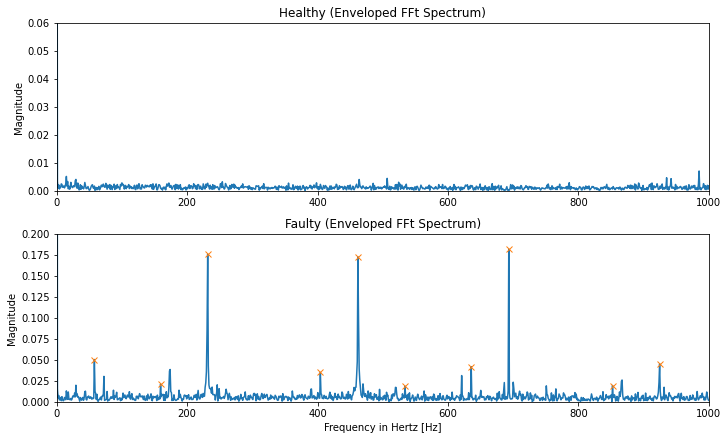

In [41]:
Hpeaks = Henv.peaks(prominence= 100)  # Healthy peaks location 
Fpeaks = Fenv.peaks(prominence= 50, threshold=130, distance=30)  # Faulty peaks location

fig, (ax1, ax2) = plt.subplots(ncols=1, nrows=2, constrained_layout=True, figsize=(10, 6))

########## Healthy Data ###########
ax1.set_title('Healthy (Enveloped FFt Spectrum)')
ax1.plot(Hfreq_env, Hmag_env)
ax1.set_ylim(0, 0.06)
ax1.set_xlim(0, 1000)
# ax1.set_xlabel('Frequency in Hertz [Hz]')
ax1.set_ylabel('Magnitude')
ax1.plot(Hpeaks, (Hmag_env)[[int(i) for i in Hpeaks/N]], "x")
ax1.plot(np.zeros_like(len(Hmag_env)), "--", color="gray")

########## Faulty Data #############
ax2.set_title('Faulty (Enveloped FFt Spectrum)')
ax2.plot(Ffreq_env, Fmag_env)
ax2.set_ylim(0, 0.2)
ax2.set_xlim(0, 1000)
ax2.set_xlabel('Frequency in Hertz [Hz]')
ax2.set_ylabel('Magnitude')
ax2.plot(Fpeaks, (Fmag_env)[[int(i) for i in Fpeaks/N]], "x")
ax2.plot(np.zeros_like(len(Fmag_env)), "--", color="gray")

In [42]:
Fpeaks  # The Peak values in Faulty data

array([  57.6171875,  159.1796875,  231.4453125,  404.296875 ,
        461.9140625,  534.1796875,  635.7421875,  693.359375 ,
        852.5390625,  924.8046875, 1097.65625  , 1329.1015625,
       1386.71875  , 1618.1640625, 1856.4453125, 2080.078125 ,
       2311.5234375, 2549.8046875, 2773.4375   , 3004.8828125,
       3243.1640625, 3936.5234375])

As we can see above, Bearing Vibration has prominent peak values in 237 Hz and it's Harmonics (473,710) which is equal to the Outer Race Fault Frequency (BPFO) of the Bearing.